> ## **PANDAS SERIES**
> A Pandas Series is a `one-dimensional labeled array of values`, similar to a fixed-size dictionary in Python. It is a fundamental data structure in the Pandas library, often used to represent a single column of a DataFrame or a collection of data with a single index.

In [3]:
import numpy as np
import pandas as pd

<hr>

> ### SERIRS CREATION METHODS
> #### 1. Series
> From both python list and dictonaries you will be able to create pandas series
> 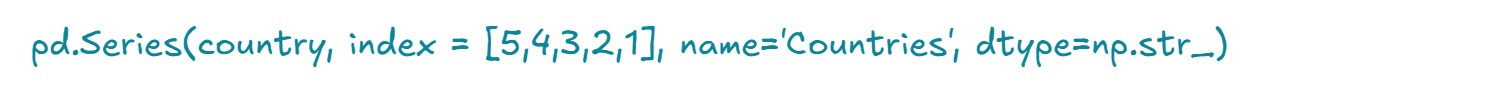
> Important params :
> - `dtype`: desired data type for the resultant series.
> - `name`: Name of series
> - `index`: index for series elements

In [4]:
country = ['India','Pakistan','USA','Nepal','Srilanka']
pd.Series(country, index = [5,4,3,2,1], name='Countries', dtype=np.str_)
# Length of index must match to the length of country
# sr.iloc[0] -> India

5       India
4    Pakistan
3         USA
2       Nepal
1    Srilanka
Name: Countries, dtype: object

In [5]:
# List of marks obtained in different subjects
marks = [67,57,89,100]
# List of subjects corresponding to the marks
subjects = ['maths','english','science','hindi']
# Creating a pandas Series with marks and subjects as index
pd.Series(marks,index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

In [6]:
# keys become indices and values become values
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}
marks_series = pd.Series(marks,name='marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: marks, dtype: int64

In [7]:
pd.Series(marks, name='marks', index=[1,2,3,4,5])
# Keys become indices of series

1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: marks, dtype: float64

> `NOTE` - When you provide an `array` for creating a series the custom indices which you provide could be any, but in the case of `dictonaries`, the indices must be the keys used in that dictonary

<hr>

> ### SERIES ATTRIBUTES
> - `size` - Includeing NaN values 
> - `dtype`
> - `name`
> - `index`
> - `values`
> - `is_unique` - If all elements are unique then return True else False
> - `shape`

In [8]:
# size
marks_series.size

4

In [9]:
# dtype
marks_series.dtype

dtype('int64')

In [10]:
# name
marks_series.name

'marks'

In [11]:
# is_unique - all elements must be unique
marks_series.is_unique

True

In [12]:
# string indices
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [13]:
# integer indices - returns a range
pd.Series(data = [1,2,3,4,5,6], index=[3,2,1,5,4,3]).index

Index([3, 2, 1, 5, 4, 3], dtype='int64')

In [14]:
# values
marks_series.values

array([ 67,  57,  89, 100], dtype=int64)

In [15]:
marks_series.shape

(4,)

<hr>

> ### SERIES DISPLAY METHODS
> #### 2. head, tail and sample
> 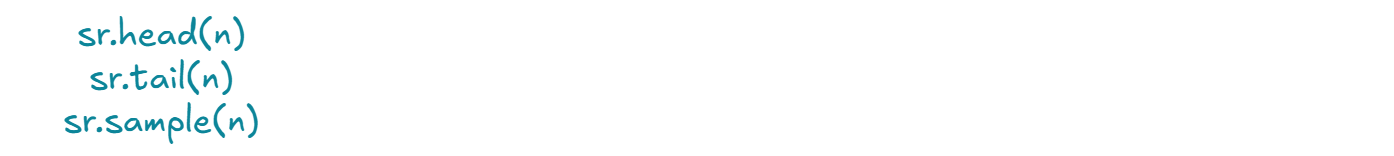
> - `sr.head(n)`: Prints 'n' initial rows<br>
> - `sr.tail(n)`: Prints 'n' bottom rows<br>
> - `sr.sample(n)` - Prints n rows after sampling<br><br>

In [20]:
# Loading Dataframes
subs_df = pd.read_csv('subs.csv')
movies_df = pd.read_csv('movies.csv')
vk_df = pd.read_csv('vk.csv')

In [26]:
subs = subs_df.iloc[:, 0]
subs.head()

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [27]:
# df.tail()
subs.tail()

360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, dtype: int64

In [18]:
# df.sample
marks_series.sample(4)

science     89
hindi      100
english     57
maths       67
Name: marks, dtype: int64

> `NOTE` - This is a view of column of dataframe and not a copy if you want to apply any method which performs `inplace operations` without explicitely mentioning it then you must have to create a copy

<hr>

> ### STRING ACCESSOR AND OPERATIONS
> #### 3. split(char) 
> Splits a string at the place of char parameter<br>
> `str` - string accessor, which is used to iterate over a string<br><br>
> 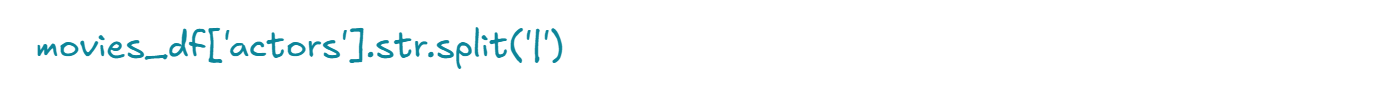 

In [35]:
movies_df['actors'].str.split('|').str # strings.accessor

In [23]:
movies_df['actors'].str.split('|').head()

0    [Vicky Kaushal, Paresh Rawal, Mohit Raina, Yam...
1    [Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat, ...
2    [Anupam Kher, Akshaye Khanna, Aahana Kumra, At...
3    [Emraan Hashmi, Shreya Dhanwanthary, Snighdade...
4    [Mona Ambegaonkar, Ananth Narayan Mahadevan, D...
Name: actors, dtype: object

In [25]:
# Task - Hero of the Movie
movies_df['Hero'] = movies_df['actors'].str.split('|').str[0]
movies_df['Hero'].head()

0       Vicky Kaushal
1         Vicky Ahuja
2         Anupam Kher
3       Emraan Hashmi
4    Mona Ambegaonkar
Name: Hero, dtype: object

<hr>

> ### SERIES SORTING & STATICTICS METHODS
> #### 4. value_counts()
> Returs the count of each unique entity in the series<br><br>
> 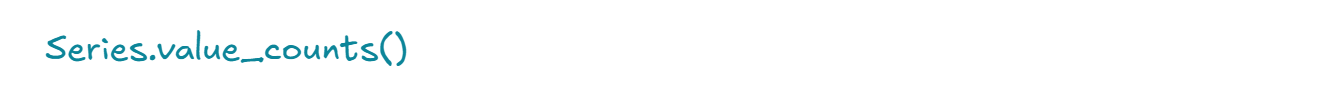

In [26]:
# value_counts -> index
movies = movies_df.set_index('original_title')['Hero']
movies.index.value_counts().head()

original_title
Tanu Weds Manu Returns    2
Andaaz                    2
LOC: Kargil               2
Ghost                     2
Holiday                   2
Name: count, dtype: int64

> #### 5. sort_values
> Sort the series on the basis if values<br><br>
> 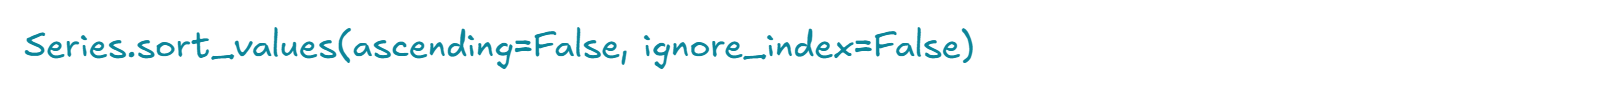
> Important Parameters:
> - `axis`: for dataframe
> - `ascending`: False - order
> - `kind`: sorting algo
> - `na_position`: first, last
> - `ignore_index`: If True, the resulting axis will be labeled 0, 1, …, n - 1.
> - `inplace`: True, False

In [50]:
# sort_values
vk.sort_values(ascending=False, ignore_index=False)

match_id
626    113
620    109
611    108
595    100
438     99
      ... 
90       0
481      0
27       0
633      0
488      0
Name: batsman_runs, Length: 141, dtype: int64

📌 `Note`: We can also pass the list to columns on which the sorting will get performed
<code>sr.sort_values(['col1', 'col2'])</code>

> #### 6. sort_index
> Sort the series on the basis if index<br><br>
> 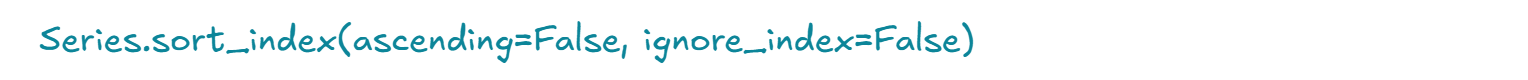<br><br>
> 📌 `Note`: We can also perform sorting by columns using this method -> axis = 1

In [52]:
# sort_index -> inplace -> movies
movies.sort_index(ascending=False, ignore_index=False, axis=0)
movies.head()

original_title
Uri: The Surgical Strike            Vicky Kaushal
Battalion 609                         Vicky Ahuja
The Accidental Prime Minister         Anupam Kher
Why Cheat India                     Emraan Hashmi
Evening Shadows                  Mona Ambegaonkar
Name: Hero, dtype: object

> #### 7. copy()
> Copy the series into new variable<br><br>
> 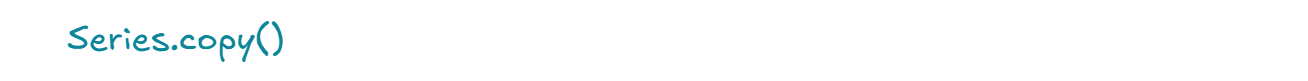

In [53]:
# copy()
vk.copy().sort_values(ascending=False)

match_id
626    113
620    109
611    108
595    100
438     99
      ... 
90       0
481      0
27       0
633      0
488      0
Name: batsman_runs, Length: 141, dtype: int64

> #### 8. count()
> Count total number of elements in the series `exclusing Null values`<br><br>
> 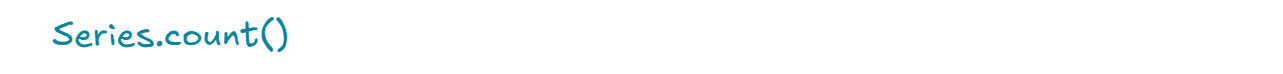

In [54]:
# count
vk.count()

141

> #### 9. sum() & prod()
> Calculates the Sum and Product of all the elements<br><br>
> 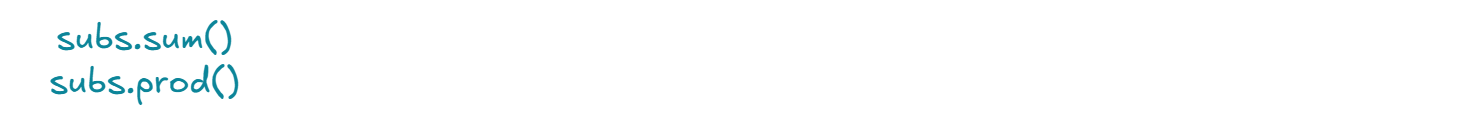

In [55]:
# sum -> product
subs.sum(skipna=True)
subs.prod(skipna=True)

49510

> #### 10. Mean(), Median() & Mode()
> Calculates the mean median and mode of series<br><br>
> 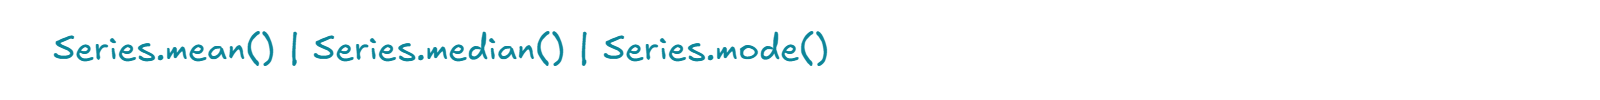

In [28]:
marks_series.mean(axis=0, skipna=True)

78.25

In [29]:
marks_series.median(axis=0, skipna=True)

78.0

In [30]:
marks_series.mode(axis=0, skipna=True)

0     57
1     67
2     89
3    100
Name: marks, dtype: int64

> #### 11. Std() & Var()
> Calculates the Standard Deviation and Variance of series<br><br>
> 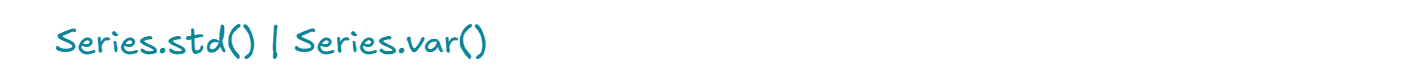

In [32]:
marks_series.std()

19.72097022630141

In [33]:
marks_series.var()

388.9166666666667

> #### 12. Max() & Min()
> Calculates the Min and Max of series<br><br>
> 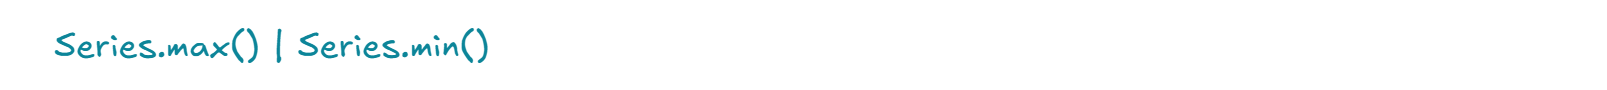

In [57]:
# min/max
subs.min()
subs.max()

396

> #### 13. describe()
> Calculates the statical and percentile values of series<br><br>
> 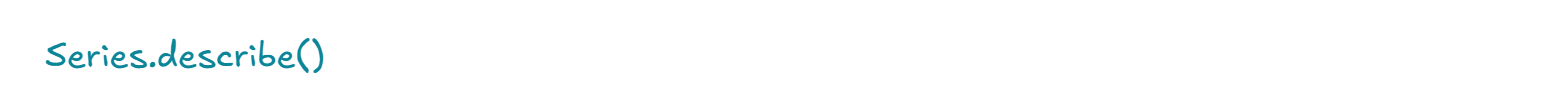

In [58]:
# describe
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

<hr>

> ### SERIES INDEXING
> `NOTE`- Pandas Series cannot work over `-ve indexing` - When `indices are integer`,
`-ve indexing` will work when the `indices are strings`.

In [ ]:
# integer indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
print(x[-1]) # indexes are int

In [ ]:
movies = pd.read_csv('/content/bollywood.csv')
temp_sr = movies.set_index('lead')['movie']

lead
Vicky Kaushal                   Uri: The Surgical Strike
Vicky Ahuja                                Battalion 609
Anupam Kher         The Accidental Prime Minister (film)
Emraan Hashmi                            Why Cheat India
Mona Ambegaonkar                         Evening Shadows
                                    ...                 
Shah Rukh Khan                    Hum Tumhare Hain Sanam
Amitabh Bachchan                     Aankhen (2002 film)
Vivek Oberoi                             Saathiya (film)
Ajay Devgn                                Company (film)
Akshay Kumar                        Awara Paagal Deewana
Name: Movie_name, Length: 1500, dtype: object

> `NOTE` - Even though we implemented `custom indices` for the upper series, pandas will store the indices corrosponding to them bts - So in both the way we can access them*

In [ ]:
temp_sr[-1] # indices are string

'Akshay Kumar'

<hr>

> ### SERIES SLICING & FANCY INDEXING
> - `Numerical Slicing` - Last index is not taken
> - `Label/String Slicing` - Last label also taken

In [ ]:
vk = pd.read_csv('/content/kohli_ipl.csv')
temp_sr = vk.set_index('match_no')['runs']
temp_sr

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [ ]:
temp_sr[2:3]

match_no
3    13
Name: runs, dtype: int64

In [ ]:
# negative slicing
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [59]:
movies[::2]

original_title
khel toh ab shuru hoga           Hazel Croney
Zor Lagaa Ke... Haiya!          Meghan Jadhav
Zindagi Tere Naam          Mithun Chakraborty
Zindagi Khoobsoorat Hai           Gurdas Maan
Zindaggi Rocks                   Sushmita Sen
                                  ...        
22 Yards                          Barun Sobti
1971                           Manoj Bajpayee
1920 London                     Sharman Joshi
16-Dec                        Danny Denzongpa
#Yaaram                      Siddhanth Kapoor
Name: Hero, Length: 815, dtype: object

In [60]:
movies['khel toh ab shuru hoga': 'Zindaggi Rocks']

original_title
khel toh ab shuru hoga            Hazel Croney
Zubeidaa                        Karisma Kapoor
Zor Lagaa Ke... Haiya!           Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Khoobsoorat Hai            Gurdas Maan
Zindagi 50 50                      Veena Malik
Zindaggi Rocks                    Sushmita Sen
Name: Hero, dtype: object

In [ ]:
# fancy indexing
vk[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [63]:
# indexing with labels -> fancy indexing
movies[['Zindagi Khoobsoorat Hai', 'Zindaggi Rocks']]

original_title
Zindagi Khoobsoorat Hai     Gurdas Maan
Zindaggi Rocks             Sushmita Sen
Name: Hero, dtype: object

<HR>

> ### UPDATING SERIES
> We can update the `perticular element` of series why normal `indexing` as well as a `subset` of series using `series clices` or `fancy indexing`

In [ ]:
# using indexing
marks_series[1] = 100
marks_series

maths       67
english    100
science     89
hindi      100
Name: nitish ke marks, dtype: int64

In [ ]:
# what if an index does not exist
marks_series['evs'] = 100
marks_series

maths       67
english    100
science     89
hindi      100
sst         90
evs        100
Name: nitish ke marks, dtype: int64

In [84]:
# slicing
runs_ser = pd.Series([23,45,33,45,34])
runs_ser[1:3] = [100,100]
runs_ser

0     23
1    100
2    100
3     45
4     34
dtype: int64

In [ ]:
# fancy indexing
runs_ser[[0,3,4]] = [0,0,0]
runs_ser

0      0
1     24
2    100
3      0
4      0
dtype: int64

In [ ]:
# using index label
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)                Alia Bhatt
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

<HR>

> ### PYTHON FUNCTIONALITIES

In [ ]:
# len/type/dir/sorted/max/min
print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs)) # python list
print(min(subs))
print(max(subs))

In [ ]:
# type conversion
list(marks_series)

[67, 100, 89, 100, 90, 100]

In [ ]:
dict(marks_series)

{'maths': 67,
 'english': 100,
 'science': 89,
 'hindi': 100,
 'sst': 90,
 'evs': 100}

In [ ]:
# membership operator
'2 States (2014 film)' in movies # Just prviding name of series finds the data in indexex and not in values

True

In [ ]:
'Alia Bhatt' in movies.values # For values use .values attribute

True

In [ ]:
# looping
for i in movies.index:
  print(i)

In [ ]:
# Arithmetic Operators(Broadcasting)
100 + marks_series

maths      167
english    200
science    189
hindi      200
sst        190
evs        200
Name: nitish ke marks, dtype: int64

In [ ]:
# Relational Operators
vk >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

<HR>

> ### BOOLEAN INDEXING

In [ ]:
# Find no of 50's and 100's scored by kohli
vk[vk >= 50].size

50

In [ ]:
# find number of ducks
vk[vk == 0].size

9

In [ ]:
# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

59

In [65]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

Hero
Akshay Kumar        51
Amitabh Bachchan    49
Ajay Devgn          42
Salman Khan         32
Sanjay Dutt         30
                    ..
Monali Thakur        1
Mahek Chahal         1
Sampat Pal Devi      1
Indrapal Ahuja       1
Fawad Khan           1
Name: count, Length: 586, dtype: int64

<HR>

> ### PLOTTING GRAPHS
> #### 13. plot()
> You can plot line plots and pie charts<br><br>
> 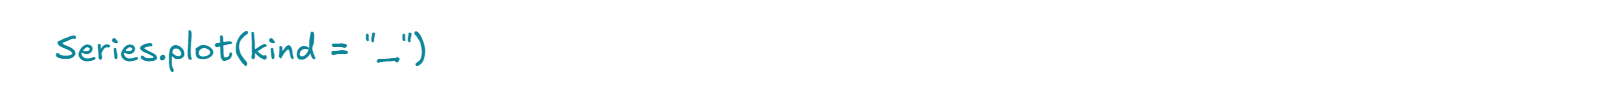

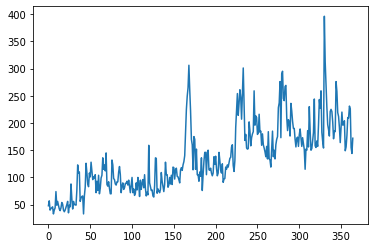

In [ ]:
subs.plot() # Pandas plot function

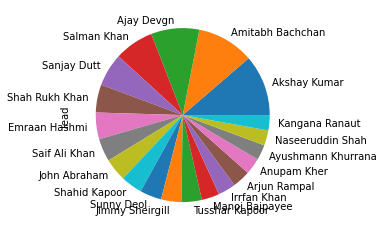

In [ ]:
movies.value_counts().head(20).plot(kind='pie')

<hr>

> ### SERIES IMPORTANT METHODS
> #### 14. astype(new_datatype)
> change the datatype of an entire series<br><br>
> 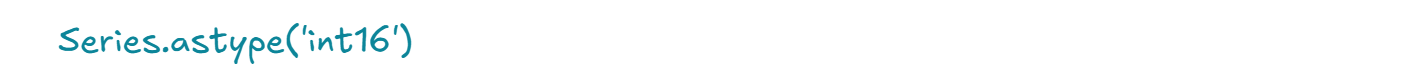

In [66]:
# astype()
vk.astype('int16')

match_id
12      62
17      28
20      64
27       0
30      10
      ... 
624     75
626    113
632     54
633      0
636     54
Name: batsman_runs, Length: 141, dtype: int16

> #### 15. clip(min, max)
> Shrink to a required range<br><br>
> 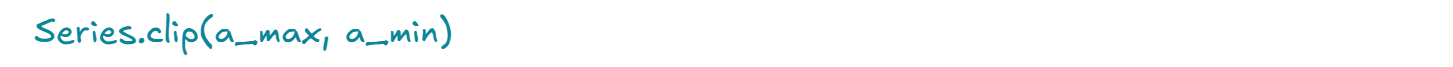

In [ ]:
# clip()
subs.clip(100,200)

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

> #### 16. drop_duplicates()
> This function used to drop the duplicates <br><br>
> 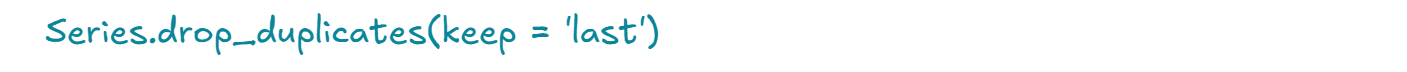
> Import Parameters:<br>
> - `keep`: NaPosition

In [67]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp.drop_duplicates(keep='last')

1    1
3    2
5    3
7    4
dtype: int64

> #### 17. duplicated()
> function will return true if the the value is already present in the series <br><br>
> 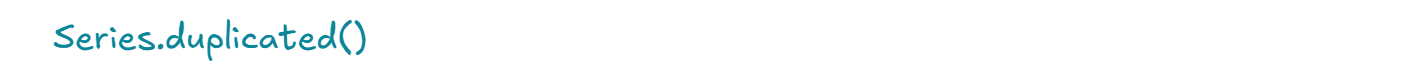

In [ ]:
temp.duplicated().sum()

4

> #### 18. isnull()
> function will return true if the value is null<br><br>
> 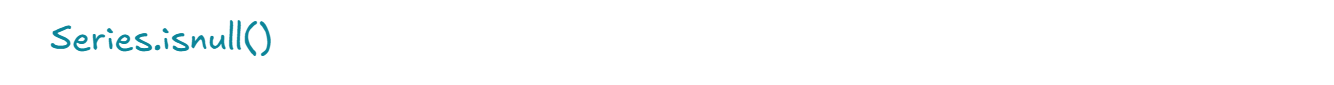

In [ ]:
# isnull
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp.isnull().sum()

3

> #### 19. dropna()
> drops the null records<br><br>
> 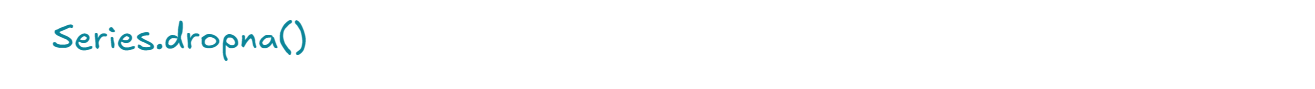

In [ ]:
# dropna
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

> #### 20. fillna()
> fill the null records with value<br><br>
> 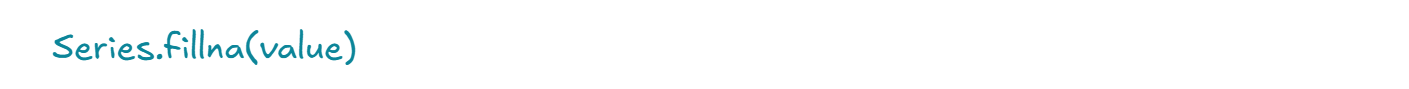

In [ ]:
# fillna
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

> #### 21. isin()
> Checks if the value is in the provided data structure<br><br>
> 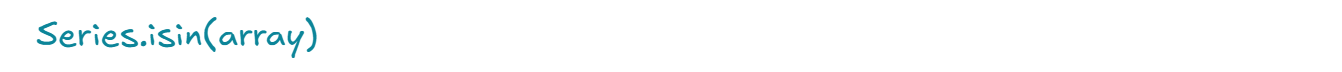

In [ ]:
# isin
vk[(vk == 49) | (vk == 99)]

match_no
82    99
86    49
Name: runs, dtype: int64

In [ ]:
vk[vk.isin([49,99])] # Returns boolean index

match_no
82    99
86    49
Name: runs, dtype: int64

> #### 22. apply()
> To apply an external function<br><br>
> 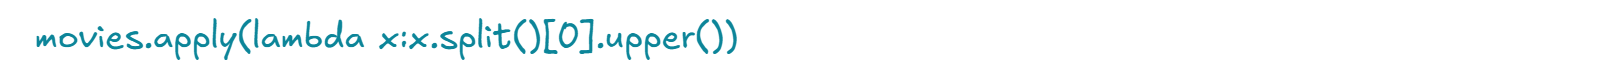

In [ ]:
movies.apply(lambda x:x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [ ]:
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

> #### 22. map()
> To apply an external function on each value<br><br>
> 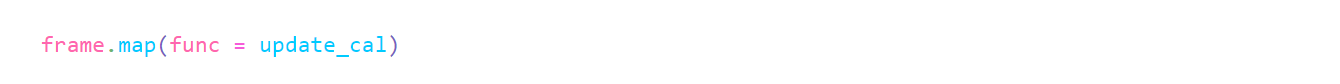

In [4]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])

def update_cal(x):
    return f"{x:.1}"


frame.map(func = update_cal)


,b,d,e
Utah,-0.4,-0.9,0.8
Ohio,0.6,-0.7,0.3
Texas,-1e+00,-0.8,-0.06
Oregon,0.3,-1e+00,2e+00


> #### 22. reindex()
> For changing the order of indices and columns<br><br>
> 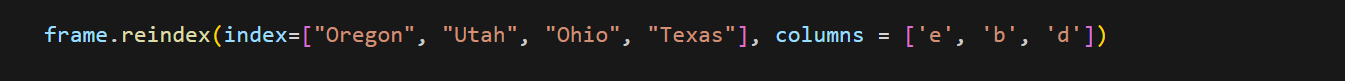

In [12]:
frame.reindex(index=["Oregon", "Utah", "Ohio", "Texas"], columns = ['e', 'b', 'd'])

,e,b,d
Oregon,1.714530,0.319083,-1.126624
Utah,0.776958,-0.407704,-0.866580
Ohio,0.336538,0.559121,-0.741564
Texas,-0.063366,-1.074412,-0.784876


> #### 22. to_methods()
> type conversion<br><br>
> 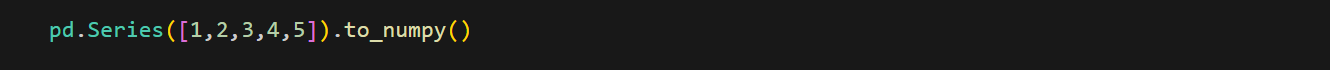

In [18]:
pd.Series([1,2,3,4,5]).to_numpy()

array([1, 2, 3, 4, 5], dtype=int64)

In [21]:
pd.Series([1,2,3,4,5]).to_dict()

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [22]:
pd.Series([1,2,3,4,5]).to_frame()

,0
0,1
1,2
2,3
3,4
4,5


In [23]:
pd.Series([1,2,3,4,5]).to_string()

'0    1\n1    2\n2    3\n3    4\n4    5'

In [20]:
pd.Series([1,2,3,4,5]).array

<NumpyExtensionArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: int64